In [29]:
# Importing libraries

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from keras.backend import clear_session
from tensorflow.keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

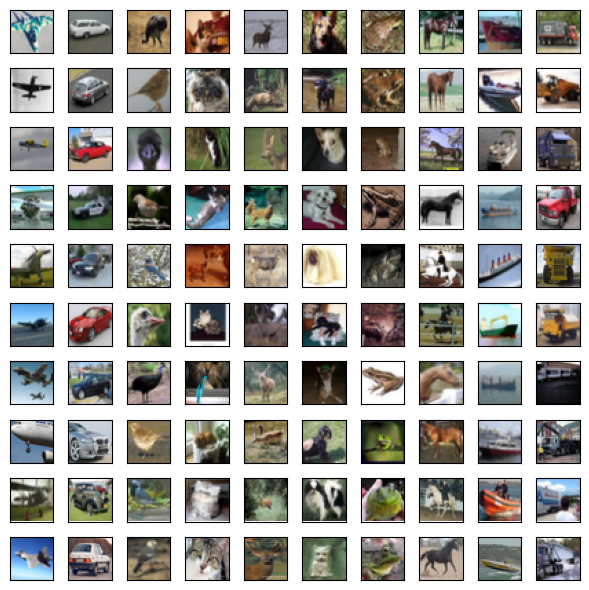

In [30]:
# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Create a 10x10 subplot grid
fig, axs = plt.subplots(10, 10, figsize=(6, 6))

# Iterate over each class
for i, c in enumerate(np.unique(y_train)):
    # Select 10 random samples from this class
    idx = np.random.choice(np.where(y_train == c)[0], 10, replace=False)
    
    # Iterate over the 10 random samples
    for j, idx_j in enumerate(idx):
        # Get the corresponding image
        img = x_train[idx_j]
        
        # Display the image in the subplot
        axs[j, i].imshow(img)
        axs[j, i].set_xticks([])
        axs[j, i].set_yticks([])

# Layout so plots do not overlap
fig.tight_layout()
plt.show()

In [31]:
# Convert the labels from numerical to categorical (one-hot encoded)
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

print(y_train.shape)
print(y_test.shape)

(50000, 10)
(10000, 10)


In [32]:
# Normalizing the images
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [33]:
clear_session()

In [34]:
# Defining the model

model_seq = Sequential()
model_seq.add(Conv2D(32, (3, 3), activation="relu", kernel_initializer="he_uniform", input_shape=(32, 32, 3)))
model_seq.add(MaxPooling2D((2, 2)))
model_seq.add(Flatten())
model_seq.add(Dense(100, activation="relu", kernel_initializer="he_uniform"))
model_seq.add(Dense(10, activation="softmax"))

model_seq.summary()

C:\Users\Javi\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 7200)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 100)            │       720,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 722,006 (2.75 MB)

 Trainable params: 722,006 (2.75 MB)

 Non-trainable params: 0 (0.00 B)

In [35]:
do_train_seq = True
if do_train_seq:
    # Compiling the model
    model_seq.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    # Training the model
    history = model_seq.fit(x_train, y_train, batch_size=512, epochs=50, validation_split=0.1)

Epoch 1/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.2323 - loss: 2.4198 - val_accuracy: 0.4410 - val_loss: 1.5880
Epoch 2/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.4648 - loss: 1.5205 - val_accuracy: 0.4990 - val_loss: 1.4275
Epoch 3/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.5218 - loss: 1.3705 - val_accuracy: 0.5274 - val_loss: 1.3347
Epoch 4/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.5531 - loss: 1.2859 - val_accuracy: 0.5542 - val_loss: 1.2832
Epoch 5/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.5650 - loss: 1.2382 - val_accuracy: 0.5654 - val_loss: 1.2419
Epoch 6/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.5843 - loss: 1.1932 - val_accuracy: 0.5796 - val_loss: 1.2075
Epoch 7/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.6024 - loss: 1.1483 - val_accuracy: 0.5856 - val_loss: 1.1856
Epoch 8/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.6082 - loss: 1.1284 - val_accuracy: 0.5922 - v

In [36]:
print(history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


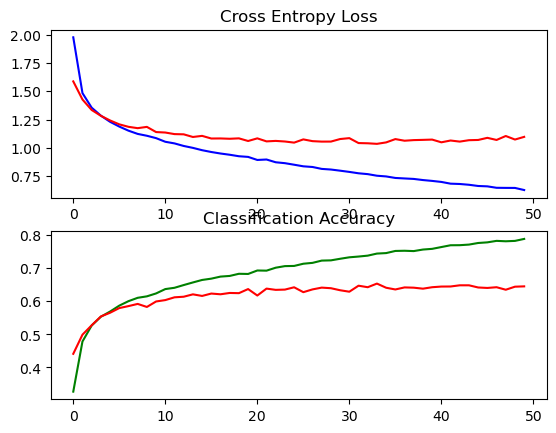

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6385 - loss: 1.1052  
Test loss: 1.1344636678695679
Test accuracy: 0.6341999769210815


In [37]:
# Plot Loss
plt.subplot(211)
plt.title('Cross Entropy Loss')
plt.plot(history.history['loss'], color='blue', label='train')
plt.plot(history.history['val_loss'], color='red', label='val')

# Plot Accuracy
plt.subplot(212)
plt.title('Classification Accuracy')
plt.plot(history.history['accuracy'], color='green', label='train')
plt.plot(history.history['val_accuracy'], color='red', label='val')
plt.show()

# Printing the loss and accuracy
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


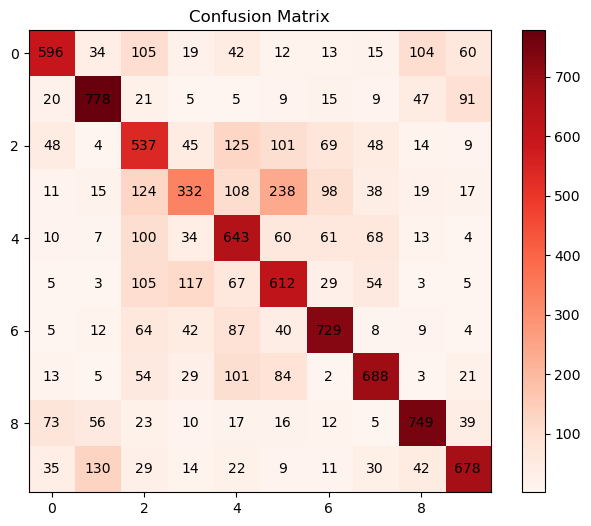

In [38]:
# Making predictions
predictions = model.predict(x_test)

# Creating a Confussion matrix
cm = confusion_matrix(
    np.argmax(y_test, axis=1),
    np.argmax(predictions, axis=1))

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap='Reds')
plt.title('Confusion Matrix')
plt.colorbar()

# Add numbers to the confusion matrix
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j], ha='center', va='center', color='black')

plt.show()

## Defining Deeper Architectures: VGG Models

*   Define a deeper model architecture for CIFAR-10 dataset and train the new model for 50 epochs with a batch size of 512. We will use VGG model as the architecture.

Stack two convolutional layers with 32 filters, each of 3 x 3. 

Use a max pooling layer and next flatten the output of the previous layer and add a dense layer with 128 units before the classification layer. 

For all the layers, use ReLU activation function. 

Use same padding for the layers to ensure that the height and width of each layer output matches the input


In [ ]:
from keras.backend import clear_session
clear_session()

In [59]:
# Defining the model
model_2 = Sequential()
model_2.add(Conv2D(32, (3, 3), activation='relu', padding='same', kernel_initializer='he_uniform', input_shape=(32, 32, 3)))
model_2.add(Conv2D(32, (3, 3), activation='relu', padding='same',kernel_initializer='he_uniform'))
model_2.add(MaxPooling2D((2, 2)))
model_2.add(Flatten())
model_2.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model_2.add(Dense(10, activation='softmax'))

model_2.summary()

C:\Users\Javi\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │     1,048,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,060,138 (4.04 MB)

 Trainable params: 1,060,138 (4.04 MB)

 Non-trainable params: 0 (0.00 B)

*   Compile the model using categorical_crossentropy loss, SGD optimizer and use 'accuracy' as the metric.
*   Use the above defined model to train CIFAR-10 and train the model for 50 epochs with a batch size of 512.

In [60]:
from keras.optimizers import SGD
custom_opt = SGD(learning_rate=0.005)

In [62]:
# Compiling the model
model_2.compile(optimizer=custom_opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Training the model
history_2 = model_2.fit(x_train, y_train, batch_size=512, epochs=50, validation_split=0.1)

Epoch 1/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 5s 55ms/step - accuracy: 0.1912 - loss: 2.2006 - val_accuracy: 0.2768 - val_loss: 2.0069
Epoch 2/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 5s 52ms/step - accuracy: 0.3010 - loss: 1.9767 - val_accuracy: 0.3212 - val_loss: 1.9085
Epoch 3/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 5s 51ms/step - accuracy: 0.3397 - loss: 1.8937 - val_accuracy: 0.3562 - val_loss: 1.8536
Epoch 4/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 5s 51ms/step - accuracy: 0.3584 - loss: 1.8384 - val_accuracy: 0.3676 - val_loss: 1.7965
Epoch 5/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 5s 53ms/step - accuracy: 0.3728 - loss: 1.7864 - val_accuracy: 0.3652 - val_loss: 1.7792
Epoch 6/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 5s 56ms/step - accuracy: 0.3891 - loss: 1.7434 - val_accuracy: 0.3926 - val_loss: 1.7245
Epoch 7/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 5s 52ms/step - accuracy: 0.4007 - loss: 1.7063 - val_accuracy: 0.3962 - val_loss: 1.6957
Epoch 8/50
88/88 ━━━━━━━━━━━━━━━━━━━━ 5s 51ms/step - accuracy: 0.4167 - loss: 1.6757 - val_accuracy: 0.4150 - v

*   Compare the performance of both the models by plotting the loss and accuracy curves of both the training steps. Does the deeper model perform better? Comment on the observation.
 

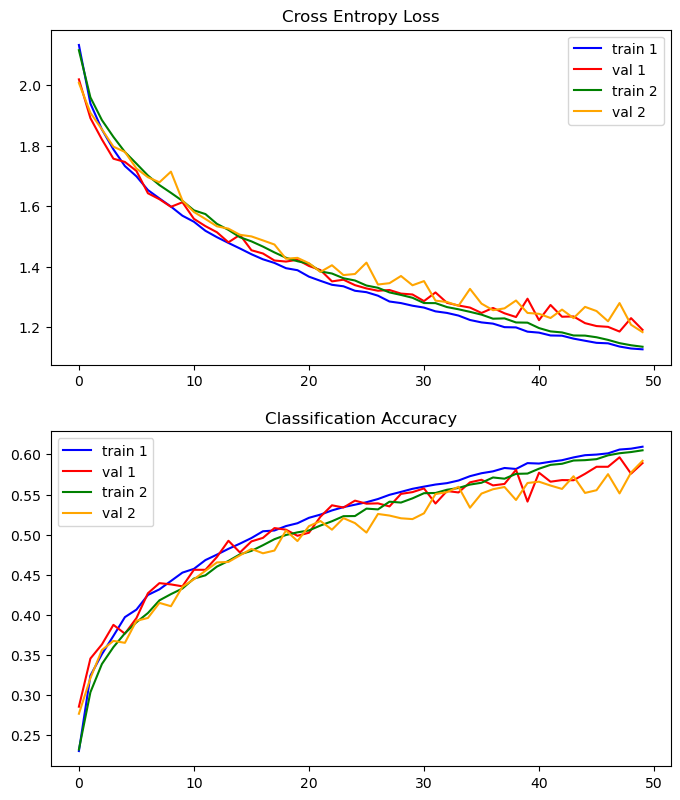

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5872 - loss: 1.1843
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5836 - loss: 1.1808
Test 1 loss: 1.1929881572723389
Test 1 accuracy: 0.583299994468689
Test 2 loss: 1.1894197463989258
Test 2 accuracy: 0.5812000036239624


In [80]:
# Plot Loss
plt.figure(figsize=(8, 20))
plt.subplot(411)
plt.title('Cross Entropy Loss')
plt.plot(history_1.history['loss'], color='blue', label='train 1')
plt.plot(history_1.history['val_loss'], color='red', label='val 1')
plt.plot(history_2.history['loss'], color='green', label='train 2')
plt.plot(history_2.history['val_loss'], color='orange', label='val 2')
plt.legend()

# Plot Accuracy
plt.subplot(412)
plt.title('Classification Accuracy')
plt.plot(history_1.history['accuracy'], color='blue', label='train 1')
plt.plot(history_1.history['val_accuracy'], color='red', label='val 1')
plt.plot(history_2.history['accuracy'], color='green', label='train 2')
plt.plot(history_2.history['val_accuracy'], color='orange', label='val 2')
plt.legend()
plt.show()

# Printing the loss and accuracy
test_loss_1, test_acc_1 = model_1.evaluate(x_test, y_test)
test_loss_2, test_acc_2 = model_2.evaluate(x_test, y_test)
print('Test 1 loss:', test_loss_1)
print('Test 1 accuracy:', test_acc_1)
print('Test 2 loss:', test_loss_2)
print('Test 2 accuracy:', test_acc_2)

**Comment on the observation**
Test 1 loss: 1.1929
Test 1 accuracy: 0.5832
Test 2 loss: 1.1894
Test 2 accuracy: 0.5812

The model actually performed worse with more depth after adding the 2nd convolutional layer.

*   Use predict function to predict the output for the test split
*   Plot the confusion matrix for the new model and comment on the class confusions.


In [81]:
from sklearn.metrics import confusion_matrix

predictions = model_2.predict(x_test)
predictions = np.argmax(predictions, axis=1)
confusion_matrix(np.argmax(y_test, axis=1), predictions)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[693,  25,  54,  15,   7,  12,  25,   5, 116,  48],
       [ 53, 710,   8,   7,   3,   6,  18,   5,  56, 134],
       [110,  19, 476,  49,  76,  83, 106,  37,  23,  21],
       [ 33,  24,  90, 389,  63, 184, 130,  27,  22,  38],
       [ 65,  11, 156,  72, 425,  55, 128,  56,  18,  14],
       [ 25,   7,  94, 175,  53, 476,  68,  57,  26,  19],
       [ 16,  18,  76,  51,  42,  33, 718,  16,  15,  15],
       [ 46,  13,  55,  59,  55,  94,  49, 569,   8,  52],
       [117,  64,  13,  14,   4,   9,  10,   7, 724,  38],
       [ 68, 163,  16,  12,   5,  10,  24,  19,  51, 632]], dtype=int64)

**Comment here :**

Classes 1 and 2 are often confused with each other, as well as with Class 9.

Classes 3 and 4 are often confused with each other, as well as with Class 5.

Classes 5 and 6 are often confused with each other, as well as with Class 7.

Class 7 separated from other ones in most cases, and has better accuracy.

Classes 8 and 9 are often confused with each other, as well as with Class 10.

*    Print the test accuracy for the trained model.

In [82]:
print('Test 2 accuracy:', test_acc_2)

Test 2 accuracy: 0.5812000036239624


## Define the complete VGG architecture.

Stack two convolutional layers with 64 filters, each of 3 x 3 followed by max pooling layer. 

Stack two more convolutional layers with 128 filters, each of 3 x 3, followed by max pooling, followed by two more convolutional layers with 256 filters, each of 3 x 3, followed by max pooling. 

Flatten the output of the previous layer and add a dense layer with 128 units before the classification layer. 

For all the layers, use ReLU activation function. 

Use same padding for the layers to ensure that the height and width of each layer output matches the input

*   Change the size of input to 64 x 64.

In [111]:
from keras.backend import clear_session
clear_session()

In [112]:
import tensorflow as tf

print(x_train.shape)

x_train_resized = tf.image.resize(x_train, (64, 64))
x_test_resized = tf.image.resize(x_test, (64, 64))

print(x_train_resized.shape)

(50000, 32, 32, 3)
(50000, 64, 64, 3)


In [113]:
# Defining the model
model = Sequential()
model.add(Conv2D(64, (3, 3), activation='relu', padding='same', kernel_initializer='he_uniform', input_shape=(64, 64, 3)))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same',kernel_initializer='he_uniform'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same', kernel_initializer='he_uniform'))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same',kernel_initializer='he_uniform'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(256, (3, 3), activation='relu', padding='same', kernel_initializer='he_uniform'))
model.add(Conv2D(256, (3, 3), activation='relu', padding='same',kernel_initializer='he_uniform'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 64, 64, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 64, 64, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 32, 32, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 16, 16, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 16, 16, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 8, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 16384)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     2,097,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,243,978 (12.37 MB)

 Trainable params: 3,243,978 (12.37 MB)

 Non-trainable params: 0 (0.00 B)

*   Compile the model using categorical_crossentropy loss, SGD optimizer and use 'accuracy' as the metric.
*   Use the above defined model to train CIFAR-10 and train the model for 10 epochs with a batch size of 512.
*   Predict the output for the test split and plot the confusion matrix for the new model and comment on the class confusions.

In [114]:
# Compiling the model
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

# Training the model
history = model.fit(x_test_resized, y_train, batch_size=512, epochs=10, validation_split=0.1)

Epoch 1/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 35s 2s/step - accuracy: 0.1014 - loss: 2.5348 - val_accuracy: 0.1050 - val_loss: 2.3086
Epoch 2/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 36s 2s/step - accuracy: 0.1040 - loss: 2.3038 - val_accuracy: 0.1070 - val_loss: 2.3018
Epoch 3/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 35s 2s/step - accuracy: 0.1136 - loss: 2.3002 - val_accuracy: 0.0990 - val_loss: 2.3030
Epoch 4/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 35s 2s/step - accuracy: 0.1159 - loss: 2.2990 - val_accuracy: 0.0990 - val_loss: 2.3013
Epoch 5/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 34s 2s/step - accuracy: 0.1101 - loss: 2.2983 - val_accuracy: 0.1010 - val_loss: 2.3045
Epoch 6/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 35s 2s/step - accuracy: 0.1256 - loss: 2.2947 - val_accuracy: 0.1070 - val_loss: 2.3055
Epoch 7/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 35s 2s/step - accuracy: 0.1298 - loss: 2.2948 - val_accuracy: 0.0940 - val_loss: 2.3052
Epoch 8/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 35s 2s/step - accuracy: 0.1260 - loss: 2.2941 - val_accuracy: 0.1010 - val_loss:

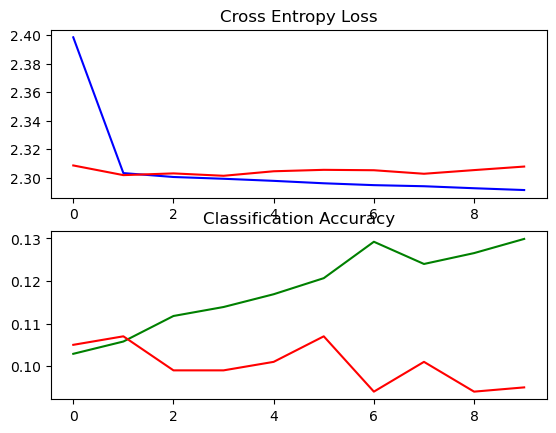

313/313 ━━━━━━━━━━━━━━━━━━━━ 13s 40ms/step - accuracy: 0.0906 - loss: 2.3096
Test loss: 2.310455322265625
Test accuracy: 0.08980000019073486


In [117]:
# Plot Loss
plt.subplot(211)
plt.title('Cross Entropy Loss')
plt.plot(history.history['loss'], color='blue', label='train')
plt.plot(history.history['val_loss'], color='red', label='val')

# Plot Accuracy
plt.subplot(212)
plt.title('Classification Accuracy')
plt.plot(history.history['accuracy'], color='green', label='train')
plt.plot(history.history['val_accuracy'], color='red', label='val')
plt.show()

# Printing the loss and accuracy
test_loss, test_acc = model.evaluate(x_test_resized, y_test)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

In [116]:
predictions = model.predict(x_test_resized)
predictions = np.argmax(predictions, axis=1)
confusion_matrix(np.argmax(y_test, axis=1), predictions)

313/313 ━━━━━━━━━━━━━━━━━━━━ 13s 40ms/step


array([[267,   0,  94,   3,  26,   0,   8,  45, 557,   0],
       [234,   1,  37,   0,  75,   0,  12,  49, 592,   0],
       [302,  16,  34,   5,  33,   2,  21,  56, 531,   0],
       [300,  12,  51,   4,  49,   1,  11, 117, 453,   2],
       [301,  20,  33,   0,  23,   0,  25,  35, 563,   0],
       [300,  11,  33,   7,  53,   2,  19, 170, 402,   3],
       [338,  17,  17,   0,  25,   1,  10,  79, 513,   0],
       [284,   2,  32,   1,  36,   1,  18,  52, 572,   2],
       [294,   0,  57,   3,  47,   1,  15,  78, 505,   0],
       [331,   0,  49,   3,  60,   0,  11,  21, 525,   0]], dtype=int64)

# Understanding deep networks

*   What is the use of activation functions in network? Why is it needed?
*   We have used softmax activation function in the exercise. There are other activation functions available too. What is the difference between sigmoid activation and softmax activation?
*   What is the difference between categorical crossentropy and binary crossentropy loss?

**Write the answers below :**

1 - Use of activation functions:
- They're used to introduce non-linearity into the model, allowing it to learn and represent more complex relationships between inputs and outputs.
- They're neede because without them the NN wouldn't be able to learn non-linear relationships between inputs and outputs.

2 - Key Differences between sigmoid and softmax:
- Sigmoid is used for binary classification, while softmax is used for multi-class classification.
- Sigmoid outputs a value between 0 and 1, while softmax outputs a probability distribution over all classes.
- Softmax normalizes the output to ensure that the probabilities add up to 1, while sigmoid does not.
_

3 - Key Differences between categorical crossentropy and binary crossentropy loss:
- Binary crossentropy is used for binary classification, while categorical crossentropy is used for multi-class classification.
- Binary crossentropy assumes that the labels are binary (0 or 1), while categorical crossentropy assumes that the labels are one-hot encoded.
- Binary crossentropy calculates the loss for each sample separately, while categorical crossentropy calculates the loss for each sample across all classes.
_
